## Modelling Radioactive Decay by Rolling Dice

In this exercise we will model the radioactive beta decay of the unstable isotope Carbon 14 to stable Nitrogen 14 using the Monte Carlo Method.

In Beta decay, a beta particle, which is a high energy electron (beta - decay) or positron (beta + decay) is emitted from the nuceus of an atom.

In the case of Carbon 14 decay to Nitrogen 14, we have beta - decay, in which the Neutron converts to a proton, emitting an electron and an electron anti-neutrino in the process.


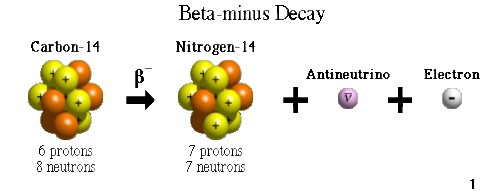

In [156]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N_init          = 10000 # Number of initial carbon 14 atoms
time           = 50000 # Length of simulation (Years)
tsteps = 1000 # Number of timesteps
lambda_C  = 0.00012096809# Decay constant of carbon 14 beta decay to Nitrogen 14 (in 1/years)


## Theoretical Model of Betay Decay

We may assume the Number of Carbon atoms at a given time $N(t)$ changes according to the differential equation

$$\frac{dN}{dt} = -\lambda N$$
where $\lambda$ is the decay constant, which characterises how fast the decay takes place, and has units $s^{-1}$.

This can be easily solved as

$$\frac{dN}{N} = - \lambda dt \implies \int \frac{dN}{N} = -\lambda \int dt $$
$$\log N = -\lambda t + C$$
But at $t=0$, the number of Carbon atoms is the initial amount of carbon atoms, $N_0$, so we find

$$\log N_0 = C \implies \log N = \lambda t + \log N_0$$

$$\log \frac{N}{N_0} = -\lambda t \implies \frac{N}{N_0} = e^{-\lambda t}$$

So we have

$$\boxed{N(t) = N_0 e^{-\lambda t}}$$


Assuming all atoms will decay to Nitrogen 14, starting in a system with $0$ Nitrogen atoms, define functions which give the number of Carbon atoms and Nitrogen atoms at a given time, given an initial number of Carbon 14 atoms.

In [157]:
def analytic_C(N_init, t): # Analytic solution for number of Carbon 14 atoms as it decays
    return N_init * np.exp (-t*lambda_C) 

def analytic_N(N_init,t): # Analytic solution for number of stable nitrogen atoms
      return (N_init) * (1 - np.exp (-t * lambda_C ))

## The Numerical Monte Carlo Method 

The Monte Carlo methods are a group of numerical algorithms which use repeated random sampling to obtain results which approximate the exact solution which may be too complex to compute or not exist.

For example, the outcomes of multiple coin tosses may be simulated by repeatedly randomly generating a number in the interval $[0,1]$, assigning heads to a number of less than or equal to one as tails and above 0.5 as heads.

Building on this analogy, in our case the outcome is not a 50/50 chance like a coin toss.

The probability of decay of a Carbon atom for a given timestep dt is given by

$$P = 1 - e^{-\lambda dt}$$

Now consider randomly generating a number in the interval $[0,1]$, if this number is below or equal to the probability of decay, we let the atom decay, if it is not, the atom does not decay.



Define a function which runs the monte-carlo algorithm through all time steps and returns both the counts of Carbon and Nitrogen at a given time.


In [158]:
def MC(N_init, time, tsteps): #Monte Carlo Function which outputs number of C and N atoms
    dt             = time / tsteps #Calculating the interval between each time step
    count_C   = np.zeros((tsteps)) #initialise
    count_N = np.zeros((tsteps))
    atoms          = np.ones((N_init)) 
    p_decay_C    = 1 - np.exp(-dt*lambda_C ) 
    for i in range(tsteps):
        
        count_C[i]   = (atoms == 1).sum() 
        count_N[i] = (atoms == 2).sum()
        
        for j in range(N_init):
            
            if atoms[j] == 1: 
                if np.random.random() <= p_decay_C:
                    atoms[j] = 2
                else:
                    atoms[j] = 1
            elif atoms[j] == 2:
                    atoms[j] = 2
                
    return count_C, count_N

## Plotting

Using your theoretical and numerical functions, plot the number of Carbon and Nitrogen atoms against time.

In [159]:
t = np.arange(0, time, time/tsteps) 
n_analytic_C = analytic_C(N_init,  t) 
n_analytic_N = analytic_N(N_init,  t) 
n_C, n_N = MC(N_init, time, tsteps) 

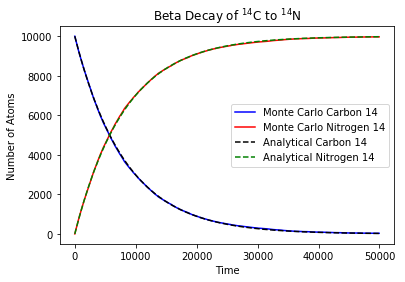

In [160]:

plt.plot(t, n_C, label = 'Monte Carlo Carbon 14', color = 'blue')
plt.plot(t, n_N, label = 'Monte Carlo Nitrogen 14', color = 'red')
plt.plot(t, n_analytic_C, label = 'Analytical Carbon 14', color = 'black', linestyle = '--')
plt.plot(t, n_analytic_N, label = 'Analytical Nitrogen 14', color = 'green', linestyle = '--')
plt.title('Beta Decay of $^{14}$C to $^{14}$N')
plt.ylabel('Number of Atoms')
plt.xlabel('Time')
plt.legend(loc='best') 




## Analysis of Data

* Using your graph, estimate the "half-life" $T_{\frac{1}{2}}$ of Carbon 14, the time at which half of all Carbon 14 atoms have decayed.

    The half-life can be calculated analytically by setting $N(t = T_{\frac{1}{2}}) = \frac{N_0}{2}$ as half the starting atoms are left, so we get

    $$\frac{N_0}{2} = N_0 e^{-\lambda t} \implies \frac{1}{2} = e^{\lambda T_{\frac{1}{2}}} \implies \log{\frac{1}{2}} = - \lambda T_{\frac{1}{2}}$$

    $$\boxed{T_{\frac{1}{2}} = \frac{\log 2}{\lambda}}$$

    Which in the case of Carbon 14 is $5730 \pm 40$ years, how does your answer compare?


* Another quantity of interest is the mean lifetime for the decay $\tau$, i.e. how long it takes on average for a particle to decay.

    This is quantity's derivation is beyond the scope of first year, however it is eventually found to have the simple form of 

    $$\tau = \frac{1}{\lambda}$$

    which for Carbon-14, is around 8266 years. Considering the theoretical equation for the number of carbon atoms, discuss why this number is considerably larger than the half-life.
    

* Finally, Radiocarbon dating is a radiometric dating method which uses the amount of Carbon 14 present in carbonaceous materials to determine the age of said materials. However, this method only works for materials up to a certain age, by looking at your graph, by what time would you image this method is no longer reliable?


In [ ]:
# Perhaps students could plot a vertical line on their graph at 5730, showing it intersects the point at which the 
# number of atoms is halved

# The answer that comes to mind is that as the number of atoms depletes, the decay will start to slow down hence the average
# lifetime is extended beyond the half-life.

# Wikipedia says the method is useful to 60,000 years, students should be expected to use the graph to determine when
# the amount of Carbon-14 is negiblible 